<a href="https://colab.research.google.com/github/WendyOira/Hypothyroidism-Prediction/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2022_2_Wendy_Oira_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Defining the question**

a) Specifying the question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Models to use:


1.   Decision trees - advanced models
2.   Support Vector Machines





##**Defining the Metric for Success**
Because we are creating a classification model, our metric of success will be model accuracy score. We will set the minumum accuracy score to be 90%.

##**Understanding the Context**

Hypothyrodism occurs when your thyroid does not produce enough of certain crucial hormones.

Hyperthyroidism occurs when your thyroid gland produces too much of the hormone thyroxine

When your thyroid doesn't produce enough hormones, the balance of chemical reactions in your body can be upset. There can be a number of causes, including autoimmune disease, hyperthyroidism treatments, radiation therapy, thyroid surgery and certain medications.

Hormones produced by the thyroid gland — triiodothyronine (T3) and thyroxine (T4) — have an enormous impact on your health, affecting all aspects of your metabolism.

**Risk Factors**

Although anyone can develop hypothyroidism, you're at an increased risk if you:

Are a woman

Are older than 60

Have a family history of thyroid disease

Have an autoimmune disease, such as type 1 diabetes or celiac disease

Have been treated with radioactive iodine or anti-thyroid medications

Received radiation to your neck or upper chest

Have had thyroid surgery (partial thyroidectomy)

Have been pregnant or delivered a baby within the past six months




The information above has been cited from www.mayoclinic.org

##**Recording the experimental design**

Define the question, the metric for success, the context, experimental design taken.

Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate recording your observations.

Performing Random forest, Gradient boosting and Support Vector Machines

Conclusion

Recommendations 

## **Dataset glossary**

Age - Age interval

Sex - M=Male or F=female

on_thyroxine - Whether taking thyroxine drugs, T=true or F=False

query_on_thyroxine - Whether taken thyroxine drugs, T=true or F=False

on_antithyroid_medication -Whether taking anti-thyroid drugs, T=true or F=False

thyroid_surgery- Whether in thyroid surgery, T=true or F=False

query_hypothyroid - Whether had hypothyroidism, T=true or F=False

query_hyperthyroid- Whether had hyperthyroidism, T=true or F=False

pregnant - Whether pregnant, T=true or F=False

sick - Whether sick, T=true or F=False

tumor - Whether have thyroid tumor, T=true or F=False

lithium- Whether taking drugs containing lithium, T=true or F=False

goitre - Whether have thyroid goitre, T=true or F=False

TSH_measured

TSH

T3_measured

T3

TT4_measured

TT4

In [104]:
# Start by importing the basic relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# Load the dataset 
thyroid = pd.read_csv('http://bit.ly/hypothyroid_data')

In [106]:
# Previewing the top of our dataset
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [107]:
# Previewing the bottom of our dataset
thyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [108]:
# Determining the no. of records in our dataset
thyroid.shape

(3163, 26)

We have 3,163 records and 26 variables

In [109]:
# Checking whether each column has an appropriate datatype
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

Our variables are in object datatype but an issue arising is that measurements cannot be object but rather integer or float 

In [110]:
# Checking statistical information
thyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [111]:
# Checking the column names in rank dataset
print('The column names in the rank dataset are :')
thyroid.columns

The column names in the rank dataset are :


Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [112]:
# Checking for null values
thyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [113]:
# Check for duplicate values 
thyroid.duplicated().sum()

77

There are 77 duplicate values

In [114]:
# Identify the exact duplicated rows
duplicate = thyroid[thyroid.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


##Data Cleaning

In [115]:
# We will start by replacing ? with NAN
thyroid_clean = thyroid.replace('?',np.nan)
# Preview the changes
thyroid_clean.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,NaN
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,NaN
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,NaN
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,NaN,y,39,y,1.21,y,32,n,NaN
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,NaN,y,7.60,y,1.02,y,7.50,n,NaN


In [116]:
# Let's checking for missing values after the changes
thyroid_clean.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

We have null values in age, sex, TSH, T3, TT4, T4U, FTI and TBG variables

In [117]:
thyroid_clean.isnull().sum().sum()

5329

We have 5,329 missing values

In [118]:
# Let's find the percentage of missing values in each column in our dataframe 
percentage = thyroid_clean.isnull().sum()*100/len(thyroid_clean)
percentage.sort_values(ascending = False)

TBG                          91.779956
T3                           21.972811
TSH                          14.796080
age                          14.100537
TT4                           7.872273
T4U                           7.840658
FTI                           7.809042
sex                           2.307936
TSH_measured                  0.000000
TBG_measured                  0.000000
FTI_measured                  0.000000
T4U_measured                  0.000000
TT4_measured                  0.000000
T3_measured                   0.000000
status                        0.000000
lithium                       0.000000
tumor                         0.000000
sick                          0.000000
pregnant                      0.000000
query_hyperthyroid            0.000000
query_hypothyroid             0.000000
thyroid_surgery               0.000000
on_antithyroid_medication     0.000000
query_on_thyroxine            0.000000
on_thyroxine                  0.000000
goitre                   

Most of the entries in TBG variable are missing 

In [119]:
# Dealing with missing values
# We will drop TBG column because it contains over 90% of missing values
thyroid_clean = thyroid_clean.drop('TBG', axis=1)
thyroid_clean.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n


In [120]:
# Dealing with missing values
# We will deal with the remaining columns with missing values 
# Before dealing with missing values in the numerical columns we will change them from object datatype 
col_1 = ['T3','TSH','age','TT4','T4U','FTI']
for i in col_1:
  thyroid_clean[i] = pd.to_numeric(thyroid_clean[i])

In [121]:
# Let's confirm the changes made
thyroid_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

We successfully changed the variables from object to float datatype

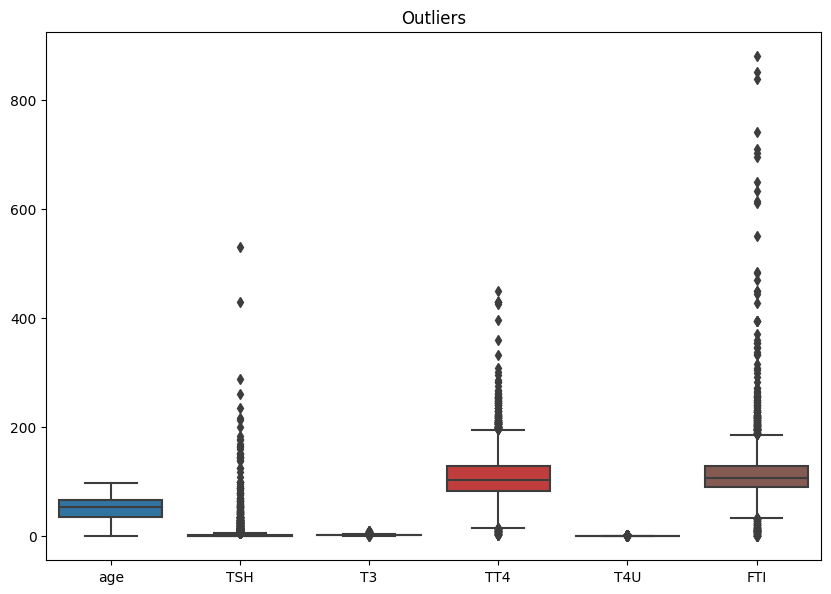

In [122]:
# We will check for outliers in our numerical data in order to determine how we will fill our
# null values in these columns
plt.figure(figsize = (10, 7), dpi=100)
sns.boxplot(data= thyroid_clean)
plt.title('Outliers')
plt.show()

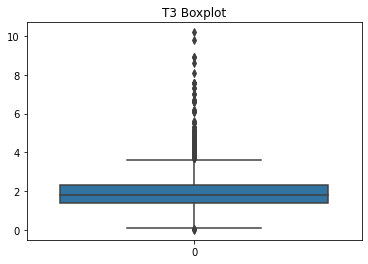

In [123]:
# We will plot individual boxplots for T3 and T4U because it's hard to see presence 
# of outliers in the above visualization
sns.boxplot(data= thyroid_clean['T3'])
plt.title('T3 Boxplot')
plt.show()

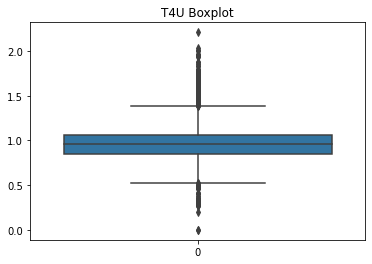

In [124]:
# T4U Boxplot
sns.boxplot(data= thyroid_clean['T4U'])
plt.title('T4U Boxplot')
plt.show()

Age is the only numerical value without outliers 

For symmetric data distribution, one can use the mean value for imputing missing values and for non symetric data distribution one can use median.This is because outliers data points will have a significant impact on the mean 

In [125]:
# We will fill null values in age column with mean 
col = ['age']
for i in col_1:
  thyroid_clean[i] = thyroid_clean[i].fillna(thyroid_clean[i].mean())

In [126]:
# We fill the null values in T3, TSH, TT4, T4U, FTI with the median
col1=['T3','TSH','TT4','T4U','FTI']
for i in col1:
  thyroid_clean[i] = thyroid_clean[i].fillna(thyroid_clean[i].median())

In [127]:
# Confirm changes made
thyroid_clean.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
dtype: int64

In [128]:
# We will fill the missing values in sex variable with the mode 
thyroid_clean = thyroid_clean.fillna(thyroid_clean['sex'].mode()[0])

In [129]:
# Confirm changes made
thyroid_clean.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

We successfully dealt with missing values in our dataframe

In [130]:
# Dealing with duplicate values 
thyroid_clean.duplicated().sum()

156

We have 156 duplicate values

In [131]:
# Dealing with the duplicate values 
# We will delete the identified duplicates
thyroid_dup = thyroid_clean.drop_duplicates(keep = 'first')
# Confirm the changes 
thyroid_dup.duplicated().sum()

0

We retained only one of the duplicated values

In [132]:
# Check the shape of our dataframe after all the changes made
thyroid_dup.shape

(3007, 25)

We now have 3,007 entries and 26 variables 

In [133]:
# Check for unique values in our dataframes inorder to identify any annomalies
columns = ['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
for i in columns:
  print('Unique values in', i , 'are :')
  print(thyroid_dup[i].unique())
  print('                                                                           ')
  print('***************************************************************************')

Unique values in status are :
['hypothyroid' 'negative']
                                                                           
***************************************************************************
Unique values in age are :
[72.         15.         24.         77.         85.         64.
 20.         42.         69.         75.         53.         59.
 68.         50.         78.         65.         28.         43.
 40.         84.         51.15421421 83.         63.         73.
 36.         27.         48.         71.         60.         34.
 79.         62.         74.         32.         41.         70.
 29.          5.         58.         35.         51.         22.
 16.         44.         39.         47.         18.         17.
 88.         56.         30.         45.         66.         52.
 54.         80.         33.         38.         92.         67.
 46.         13.         89.         61.         49.         26.
 57.         31.         90.         81.         

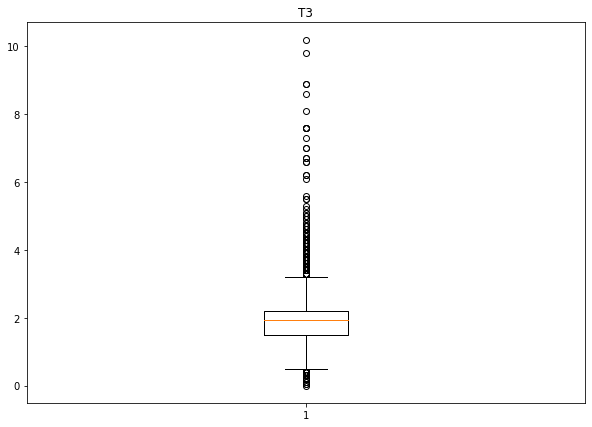

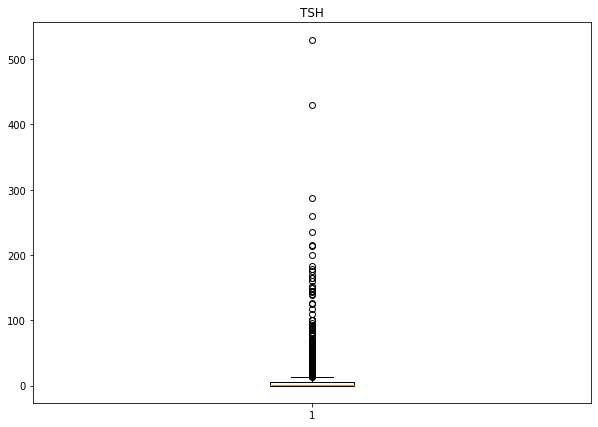

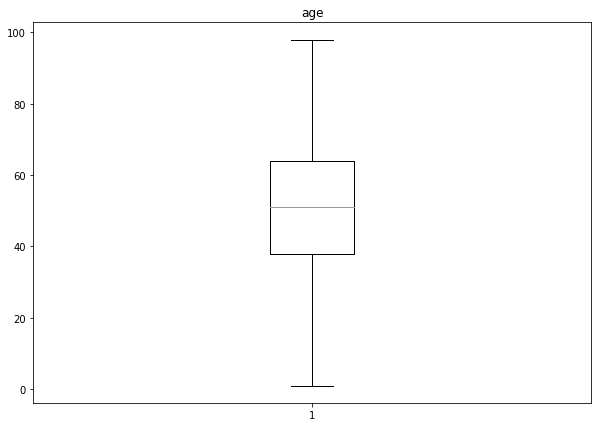

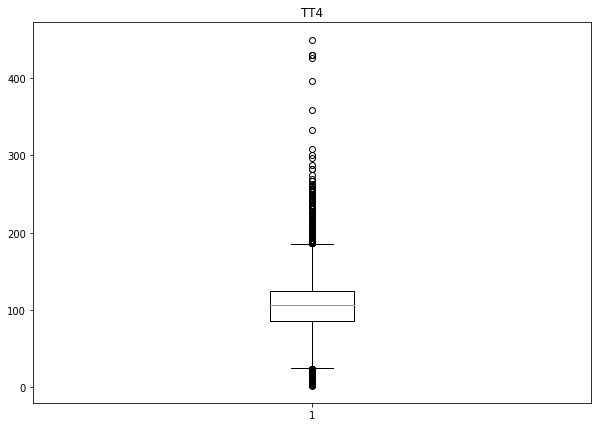

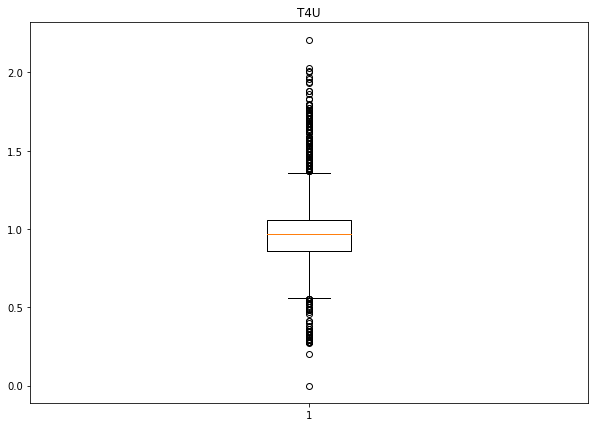

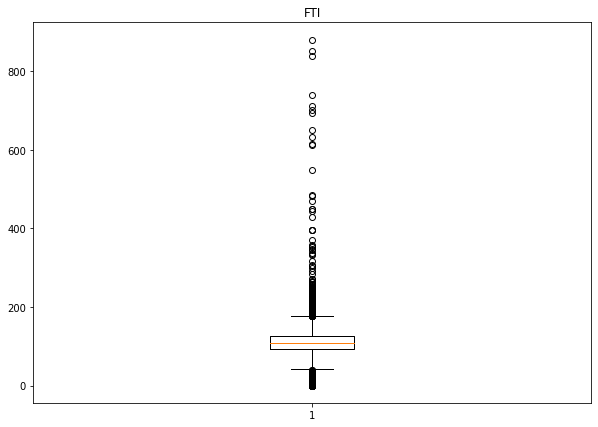

In [134]:
# We will check for outliers in our numerical columns
for i in col_1:
  fig = plt.figure(figsize = (10,7))
  plt.boxplot(thyroid_dup[i])
  plt.title(i)
  plt.show()

There are outliers in all columns apart from age

Outliers makes sense in our data beacuse these were tests done and values recorded from a range of people

##Exploratory Data Analysis

##Multivariate Analysis

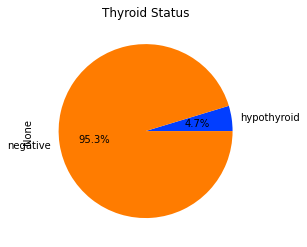

In [135]:
# Pie chart on thyroid status
pie = thyroid_dup.groupby('status').size()
colors = sns.color_palette('bright')
pie.plot.pie(autopct="%.1f%%", colors = colors)
plt.title('Thyroid Status')
plt.show()

Most patients tested negative for hypothyroid

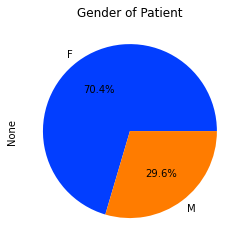

In [136]:
# Pie chart on Gender
colors = sns.color_palette('bright')
pie_2 = thyroid_dup.groupby('sex').size()
pie_2.plot.pie(autopct="%.1f%%", colors= colors)
plt.title('Gender of Patient')
plt.show()

Most patients are female 

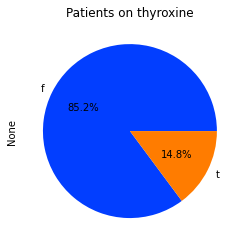

In [137]:
# Pie chart on patients on thyroxine
pie_3= thyroid_dup.groupby('on_thyroxine').size()
colors = sns.color_palette('bright')
pie_3.plot.pie(autopct="%.1f%%", colors= colors)
plt.title('Patients on thyroxine')
plt.show()

Most patients are not taking thyroxine drugs

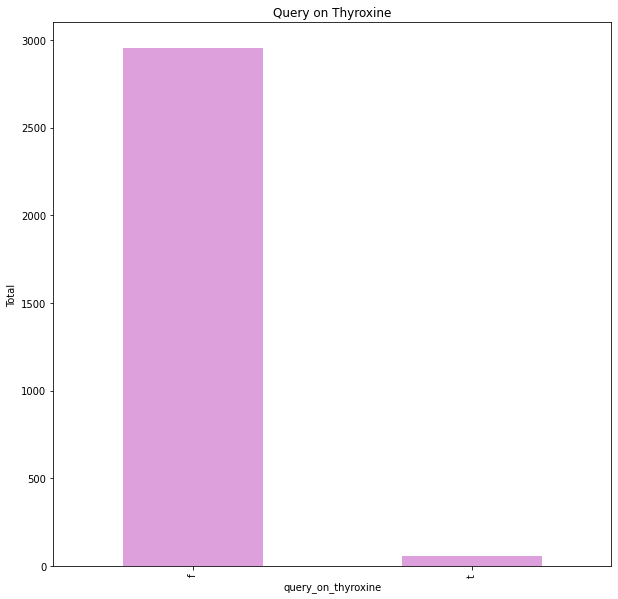

In [138]:
# Bar chart on query on thyroxine
plt.figure(figsize = (10,10))
thyroid_dup.groupby('query_on_thyroxine').size().plot(kind='bar', color='#DDA0DD')
plt.title('Query on Thyroxine')
plt.ylabel('Total')
plt.xlabel('query_on_thyroxine')
plt.show()

Most patients have not taken thyroxine drugs

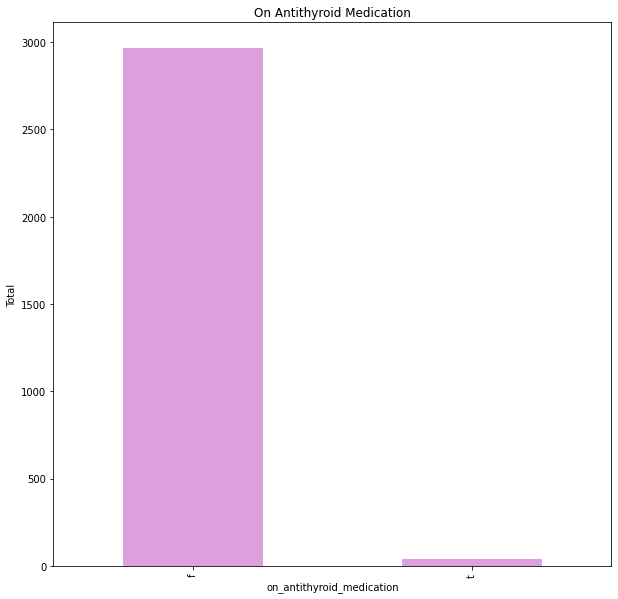

In [139]:
# Bar chart on on antithyroid medication
plt.figure(figsize = (10,10))
thyroid_dup.groupby('on_antithyroid_medication').size().plot(kind='bar', color='#DDA0DD')
plt.title('On Antithyroid Medication')
plt.ylabel('Total')
plt.xlabel('on_antithyroid_medication')
plt.show()

Most patients are not taking antithyroid medications

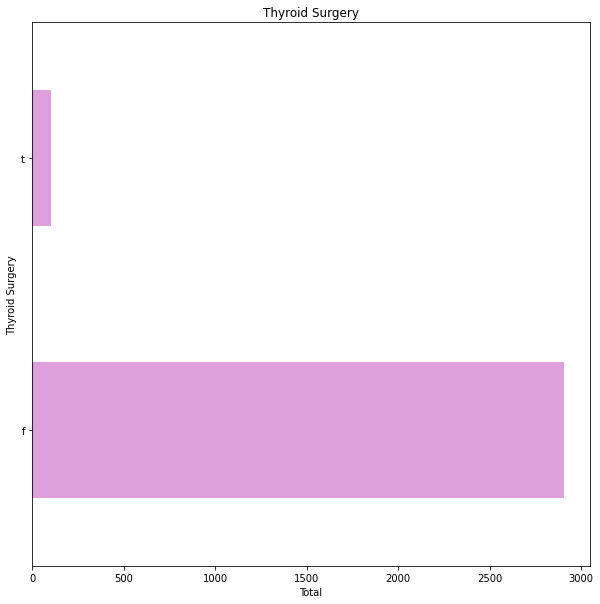

In [140]:
# Bar chart on thyroid surgery
plt.figure(figsize = (10,10))
thyroid_dup.groupby('thyroid_surgery').size().plot(kind='barh', color='#DDA0DD')
plt.title('Thyroid Surgery')
plt.ylabel('Thyroid Surgery')
plt.xlabel('Total')
plt.show()

Most patients are not in thyroid surgery

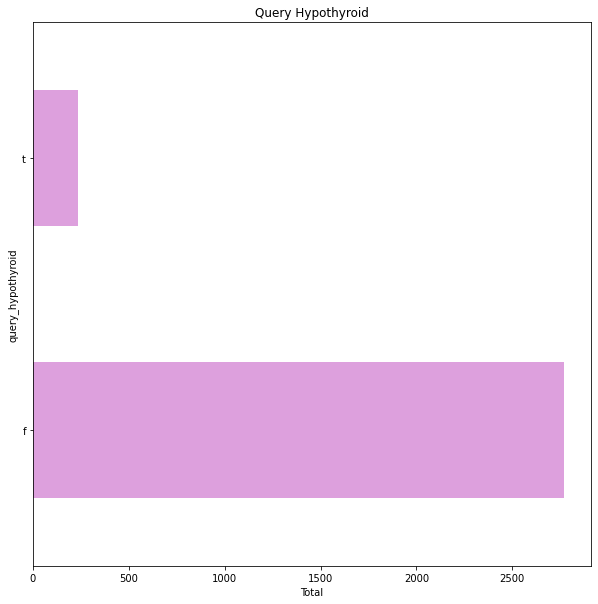

In [141]:
# Bar chart on query hypothyroid
plt.figure(figsize = (10,10))
thyroid_dup.groupby('query_hypothyroid').size().plot(kind='barh', color='#DDA0DD')
plt.title('Query Hypothyroid')
plt.ylabel('query_hypothyroid')
plt.xlabel('Total')
plt.show()

Most patients have not had hypothyroidism

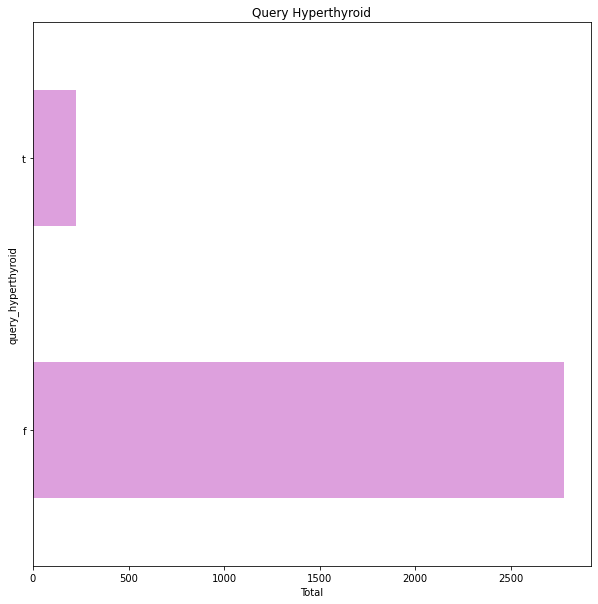

In [142]:
# Bar chart on query hyperthyroid
plt.figure(figsize = (10,10))
thyroid_dup.groupby('query_hyperthyroid').size().plot(kind='barh', color='#DDA0DD')
plt.title('Query Hyperthyroid')
plt.ylabel('query_hyperthyroid')
plt.xlabel('Total')
plt.show()

Most patients have not had hyperthyroidism

In [143]:
# Frequency tables
columns2 = ['pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured' ]
for i in columns2:
  print('Frequency table of', i)
  count = thyroid_dup[i].value_counts().head()
  print(count)
  print('**********************************************************')
  print('                                                          ')


Frequency table of pregnant
f    2946
t      61
Name: pregnant, dtype: int64
**********************************************************
                                                          
Frequency table of sick
f    2910
t      97
Name: sick, dtype: int64
**********************************************************
                                                          
Frequency table of tumor
f    2967
t      40
Name: tumor, dtype: int64
**********************************************************
                                                          
Frequency table of lithium
f    3005
t       2
Name: lithium, dtype: int64
**********************************************************
                                                          
Frequency table of goitre
f    2912
t      95
Name: goitre, dtype: int64
**********************************************************
                                                          
Frequency table of TSH_measured
y    2631
n  

Most patients were not pregnant

Most patients were not sick

Most patients do not have thyroid tumors

Most patients are not taking drugs containing lithium 

Most patients do not have thyroid goitre

Most patients had their TSH measured

Most patients had their TT4 measured

Most patients had their T4U measured

Most patients had their FTI measured

Most patients did not have their TBG measured

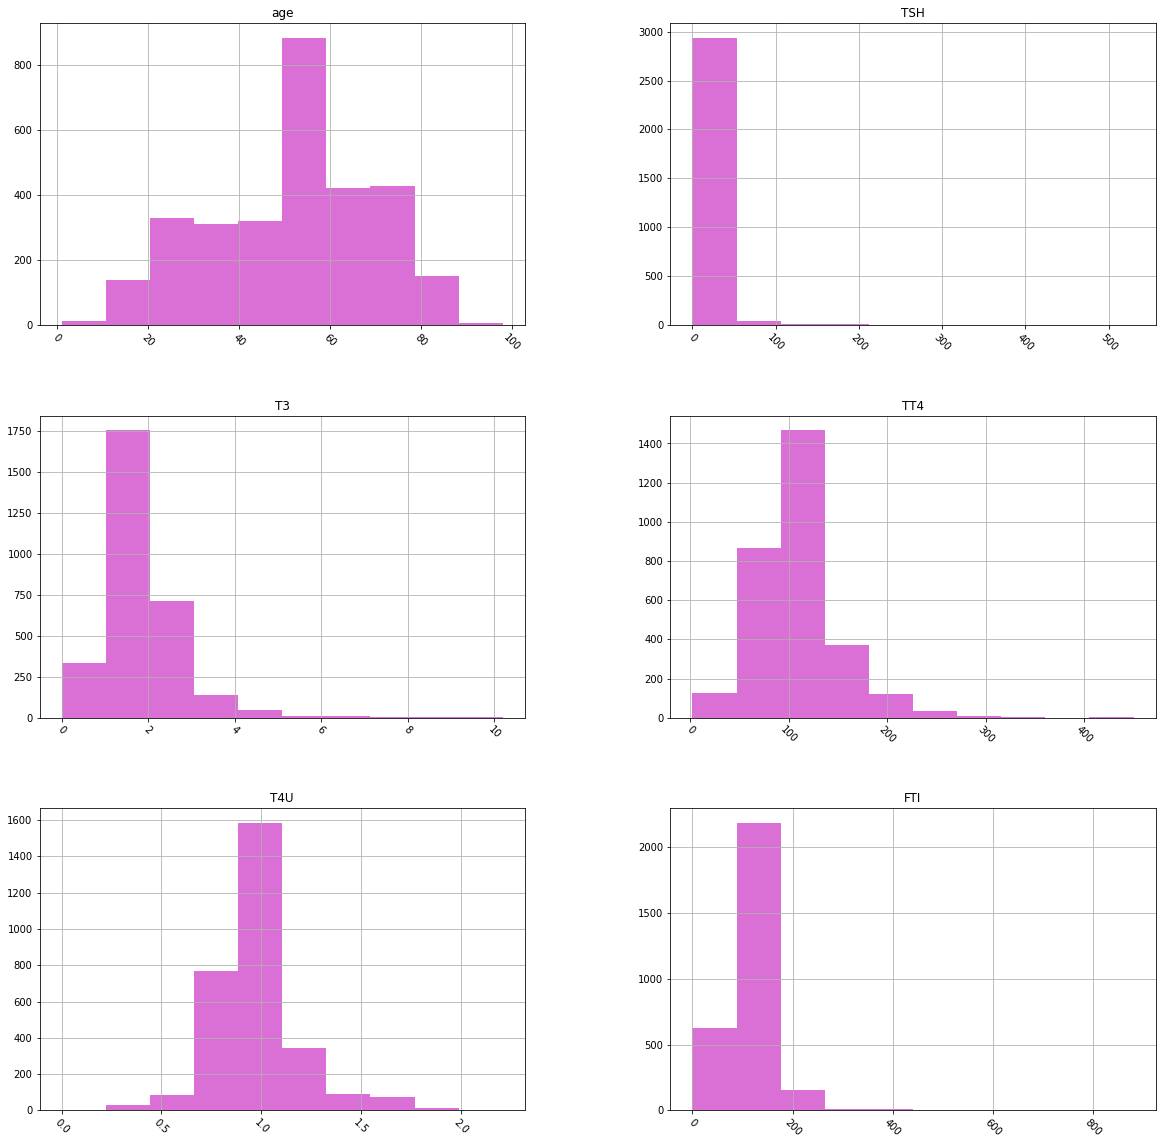

In [144]:
# Histograms of our dataframe
thyroid_dup.hist(figsize=(20,20), xrot= -45, color = '#DA70D6')
plt.show()

In [145]:
# Checking the mean, standard deviation and quantiles of our dataframe
thyroid_dup.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000
mean,51.350030,5.823557,1.934882,108.714583,0.977593,115.484252
std,17.864731,22.470602,0.876120,43.395720,0.219705,58.535310
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.154214,1.000000,1.939749,106.000000,0.970000,109.000000
75%,64.000000,5.300000,2.200000,125.000000,1.060000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [146]:
# Checking the median, mode, varaince, skewness and kurtosis of our dataframe
col3 = ['age','TSH','T3','TT4','T4U','FTI']
for i in col3:
  print('The median of', i, 'is:')
  print(thyroid_dup[i].median())
  print('The mode of', i, 'is:')
  print(thyroid_dup[i].mode())
  print('The variance of', i, 'is:')
  print(thyroid_dup[i].var())
  print('The skewness of', i, 'is:')
  print(thyroid_dup[i].skew())
  print('The kurtosis of', i, 'is:')
  print(thyroid_dup[i].kurt())
  print('                                    ')
  print('************************************')

The median of age is:
51.154214206845786
The mode of age is:
0    51.154214
dtype: float64
The variance of age is:
319.14859818026895
The skewness of age is:
-0.19784403314342464
The kurtosis of age is:
-0.6106397545900806
                                    
************************************
The median of TSH is:
1.0
The mode of TSH is:
0    0.0
dtype: float64
The variance of TSH is:
504.9279764110607
The skewness of TSH is:
11.000065170998116
The kurtosis of TSH is:
175.9888075948102
                                    
************************************
The median of T3 is:
1.9397487844408425
The mode of T3 is:
0    1.939749
dtype: float64
The variance of T3 is:
0.7675867801000512
The skewness of T3 is:
2.4179957096881046
The kurtosis of T3 is:
14.419929959213274
                                    
************************************
The median of TT4 is:
106.0
The mode of TT4 is:
0    108.85
dtype: float64
The variance of TT4 is:
1883.1885539092577
The skewness of TT4 is:
1.

The high kurtosis value in our data is an indication of outliers

Age is the only variable that is negatively skewed 

Age is fairly symmetrical 

TSH is highly skewed 

T3 is highly skewed

TT4 is highly skewed 

T4U is moderately skewed 

FTI is highly skewed

##Bivariate Analysis

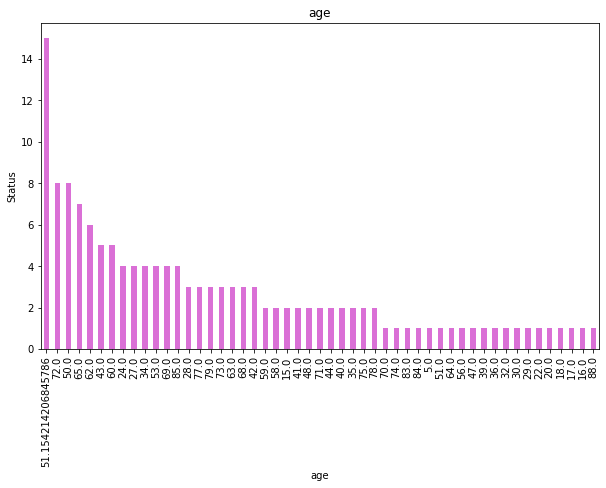

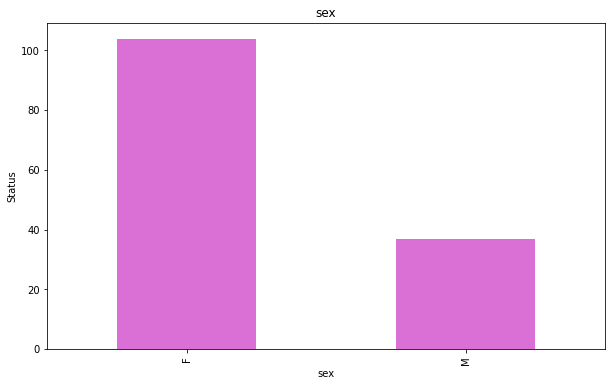

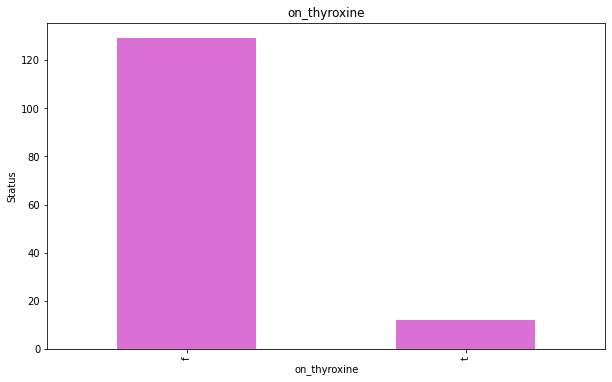

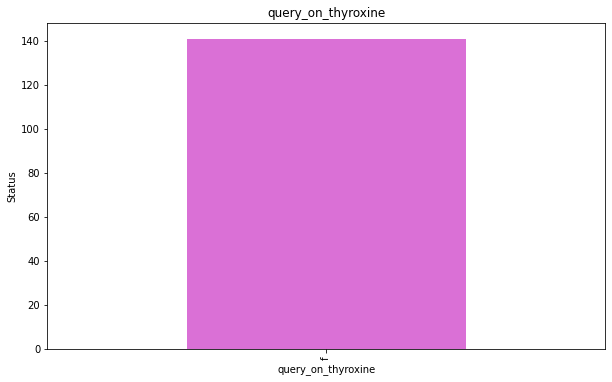

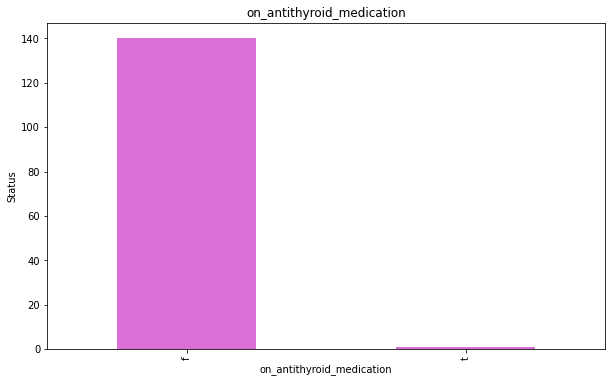

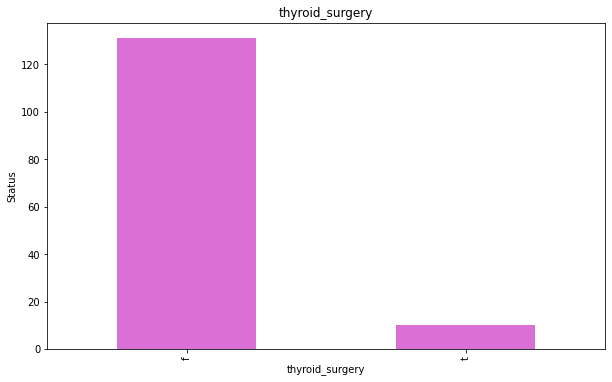

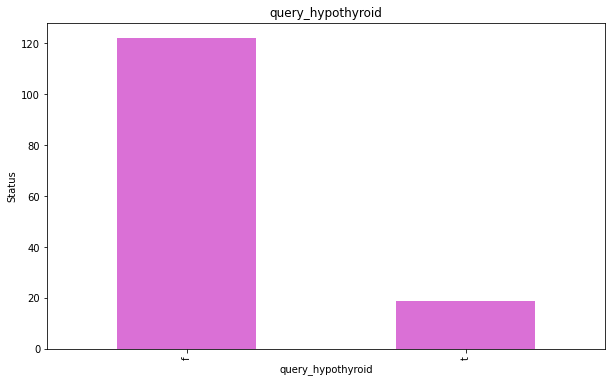

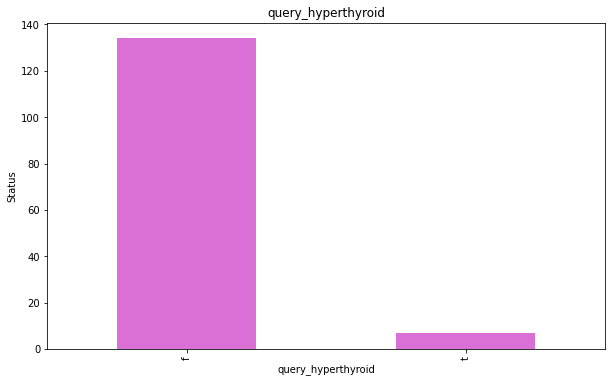

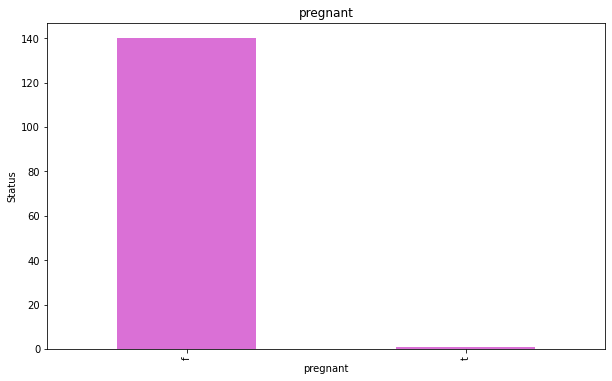

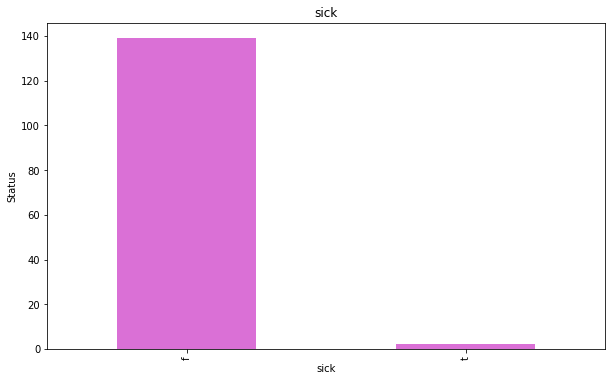

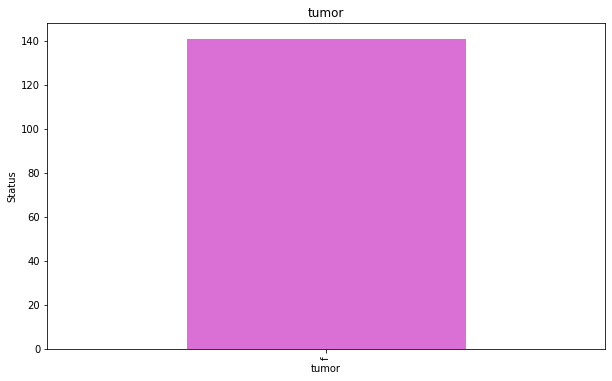

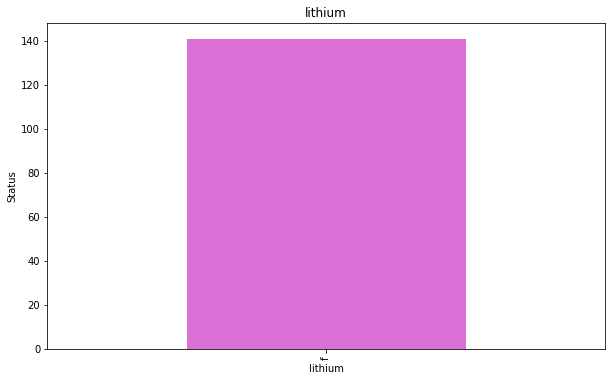

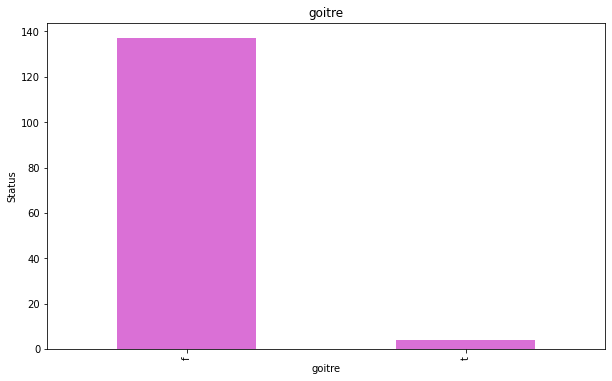

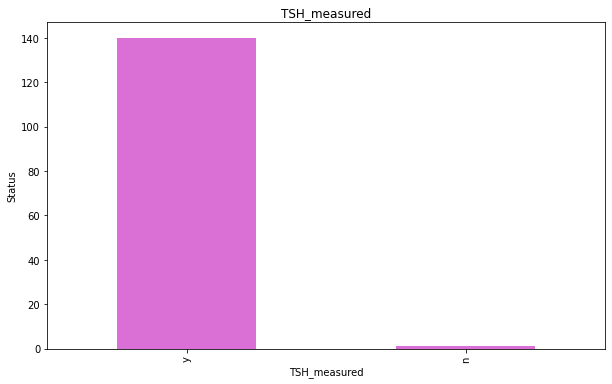

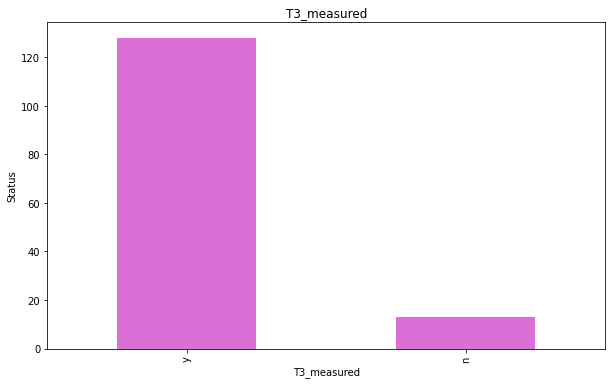

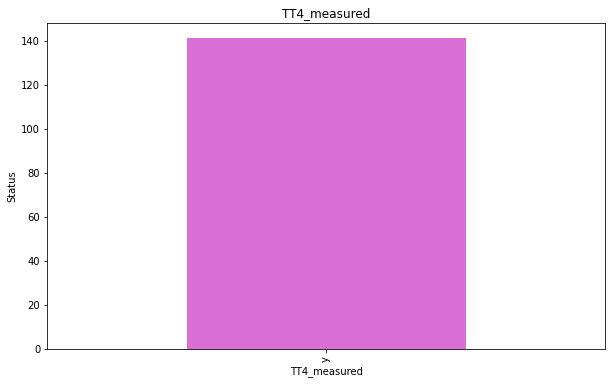

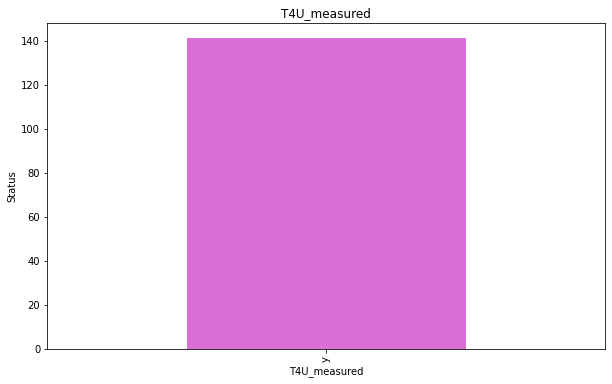

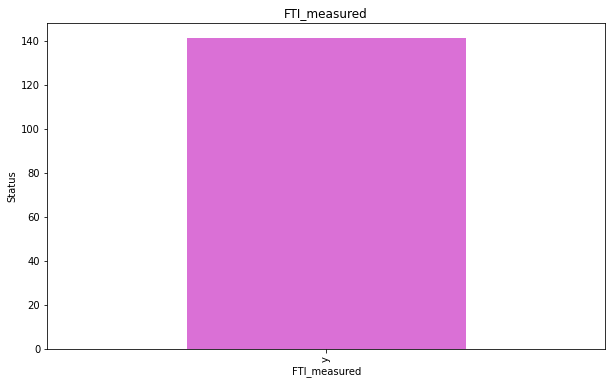

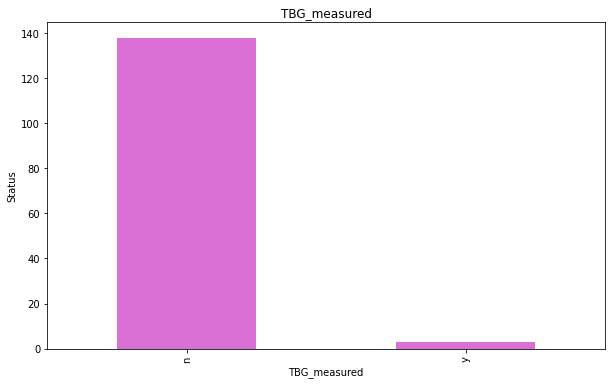

In [147]:
# Assessing the likelihood of getting hypothyroidism depending on our variables 
test = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']
for i in test:
  positive = thyroid_dup[(thyroid_dup['status']== 'hypothyroid')]
  bar= positive.groupby([i])['status'].size().sort_values(ascending= False)
  bar.plot(kind = 'bar', title= i, ylabel = 'Status' , xlabel = i , figsize =(10,6) , color = '#DA70D6')
  plt.show()

High cases of hypothyroidism were observed in:

51, 72, 50, 65 and 62 year olds

females

people who were not pregnant

people who were not thyroxine drugs

people who have never taken thyroxine drugs

people who were not taking anti-thyroid drugs

people who were not in throat surgery

people who had not had hypothyroidism

people who had not had hyperthyroidism

people who were not sick 

people who do not have thyroid tumor

people who are not taking drugs containing lithium

people who do not have thyroid goitre 

people who had their TSH, T3, TT4, T4U measured

people who did not have their TBG measured







In [148]:
# Asses correlation between our variables 
thyroid_dup.corr()

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.007766,-0.269517,-0.087480,-0.191304,0.018105
TSH,-0.007766,1.000000,-0.169663,-0.309021,0.072491,-0.240040
T3,-0.269517,-0.169663,1.000000,0.534040,0.386510,0.281658
TT4,-0.087480,-0.309021,0.534040,1.000000,0.320416,0.677343
T4U,-0.191304,0.072491,0.386510,0.320416,1.000000,-0.294438
FTI,0.018105,-0.240040,0.281658,0.677343,-0.294438,1.000000


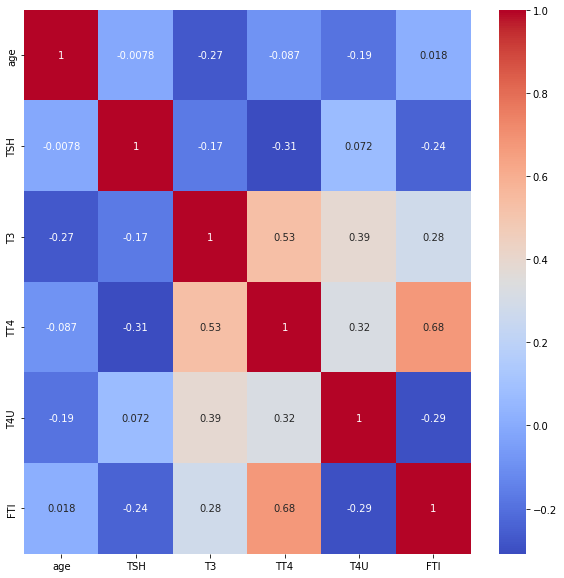

In [149]:
# Plot a heatmap
# Visualisation to asses correlation 
fig, heat = plt.subplots(figsize = (10,10))
heat = sns.heatmap(thyroid_dup.corr(), annot = True, cmap = 'coolwarm')

There is a strong positive relationship between TT4 and FTI

There is a moderate positive relationship between T3 and TT4

There is a weak positive relationship between T3 and T4U

There is a weak negative relationship between TSH and TT4

There is weak positive relationship between TT4 and T4U



<Figure size 700x500 with 0 Axes>

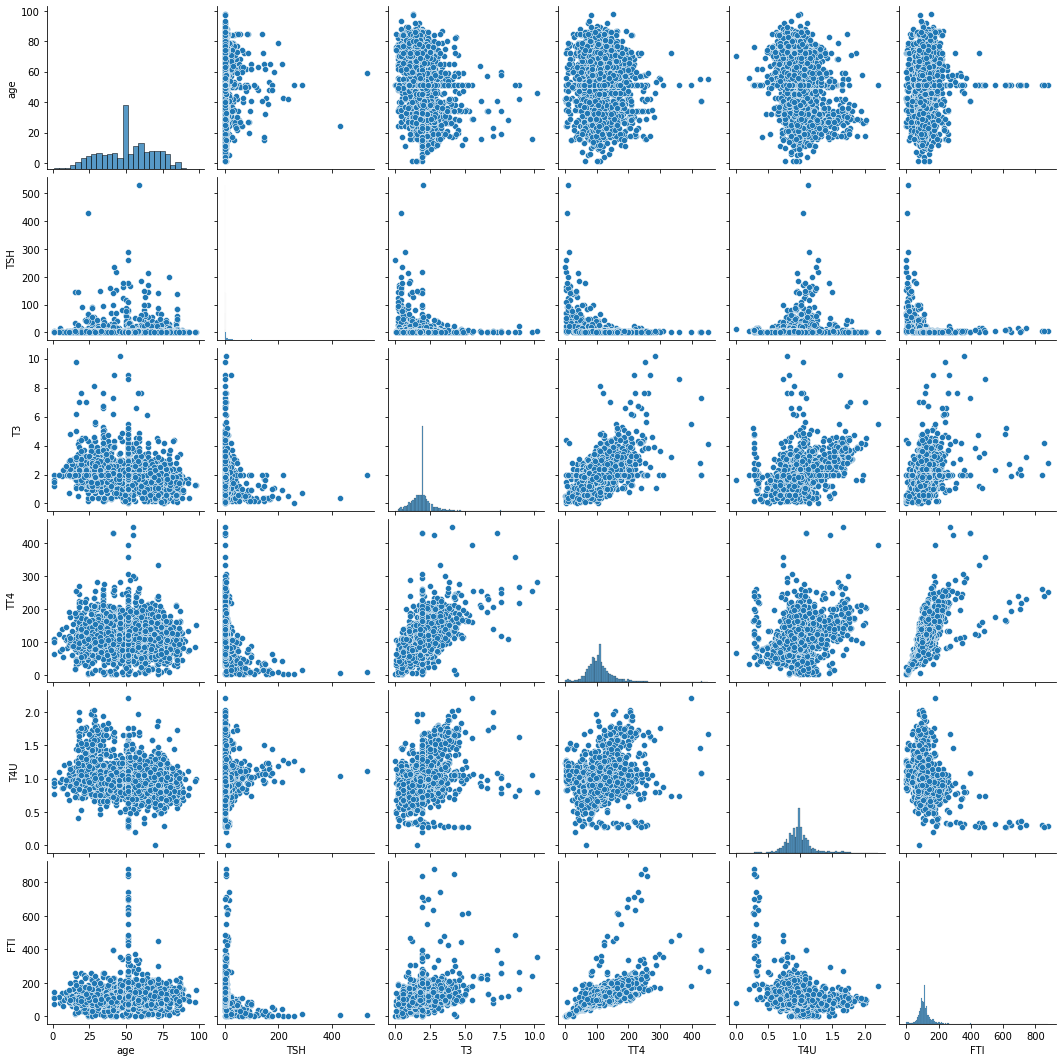

In [150]:
# Plotting a pairplot of all the numerical values
# Visualisation to asses correlation are results above
plt.figure(figsize = (7, 5), dpi=100)
sns.pairplot(thyroid_dup)
plt.show()

##Modelling

In [151]:
# Before proceeding to setting up our models 
# We will convert categorical values to numerical values
final = thyroid_dup.replace(['f', 't','M', 'F','y', 'n','hypothyroid','negative'],[0, 1, 0, 1, 0, 1, 0, 1])
final.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,1
1,0,15.0,1,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,1
2,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,1
3,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,1
4,0,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,1


In [152]:
# Next step is to split our data into independent and dependent variables
X = final.drop('status',axis=1)
y = final.status

In [153]:
# Standardizing independents variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

##Random Forest

In [154]:
# Import the relevant library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Train using 80% of the data.
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=0.2, random_state=1)
# Create a Random Forest classifier
forest = RandomForestClassifier()

In [155]:
# Train the Random Forest model 
forest.fit(X_train_forest, y_train_forest)
# Predict based on the model we've trained
y_pred_forest = forest.predict(X_test_forest)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_forest, y_pred_forest))

Accuracy: 0.978405315614618


Our random forest model is almost 97.8% accurate

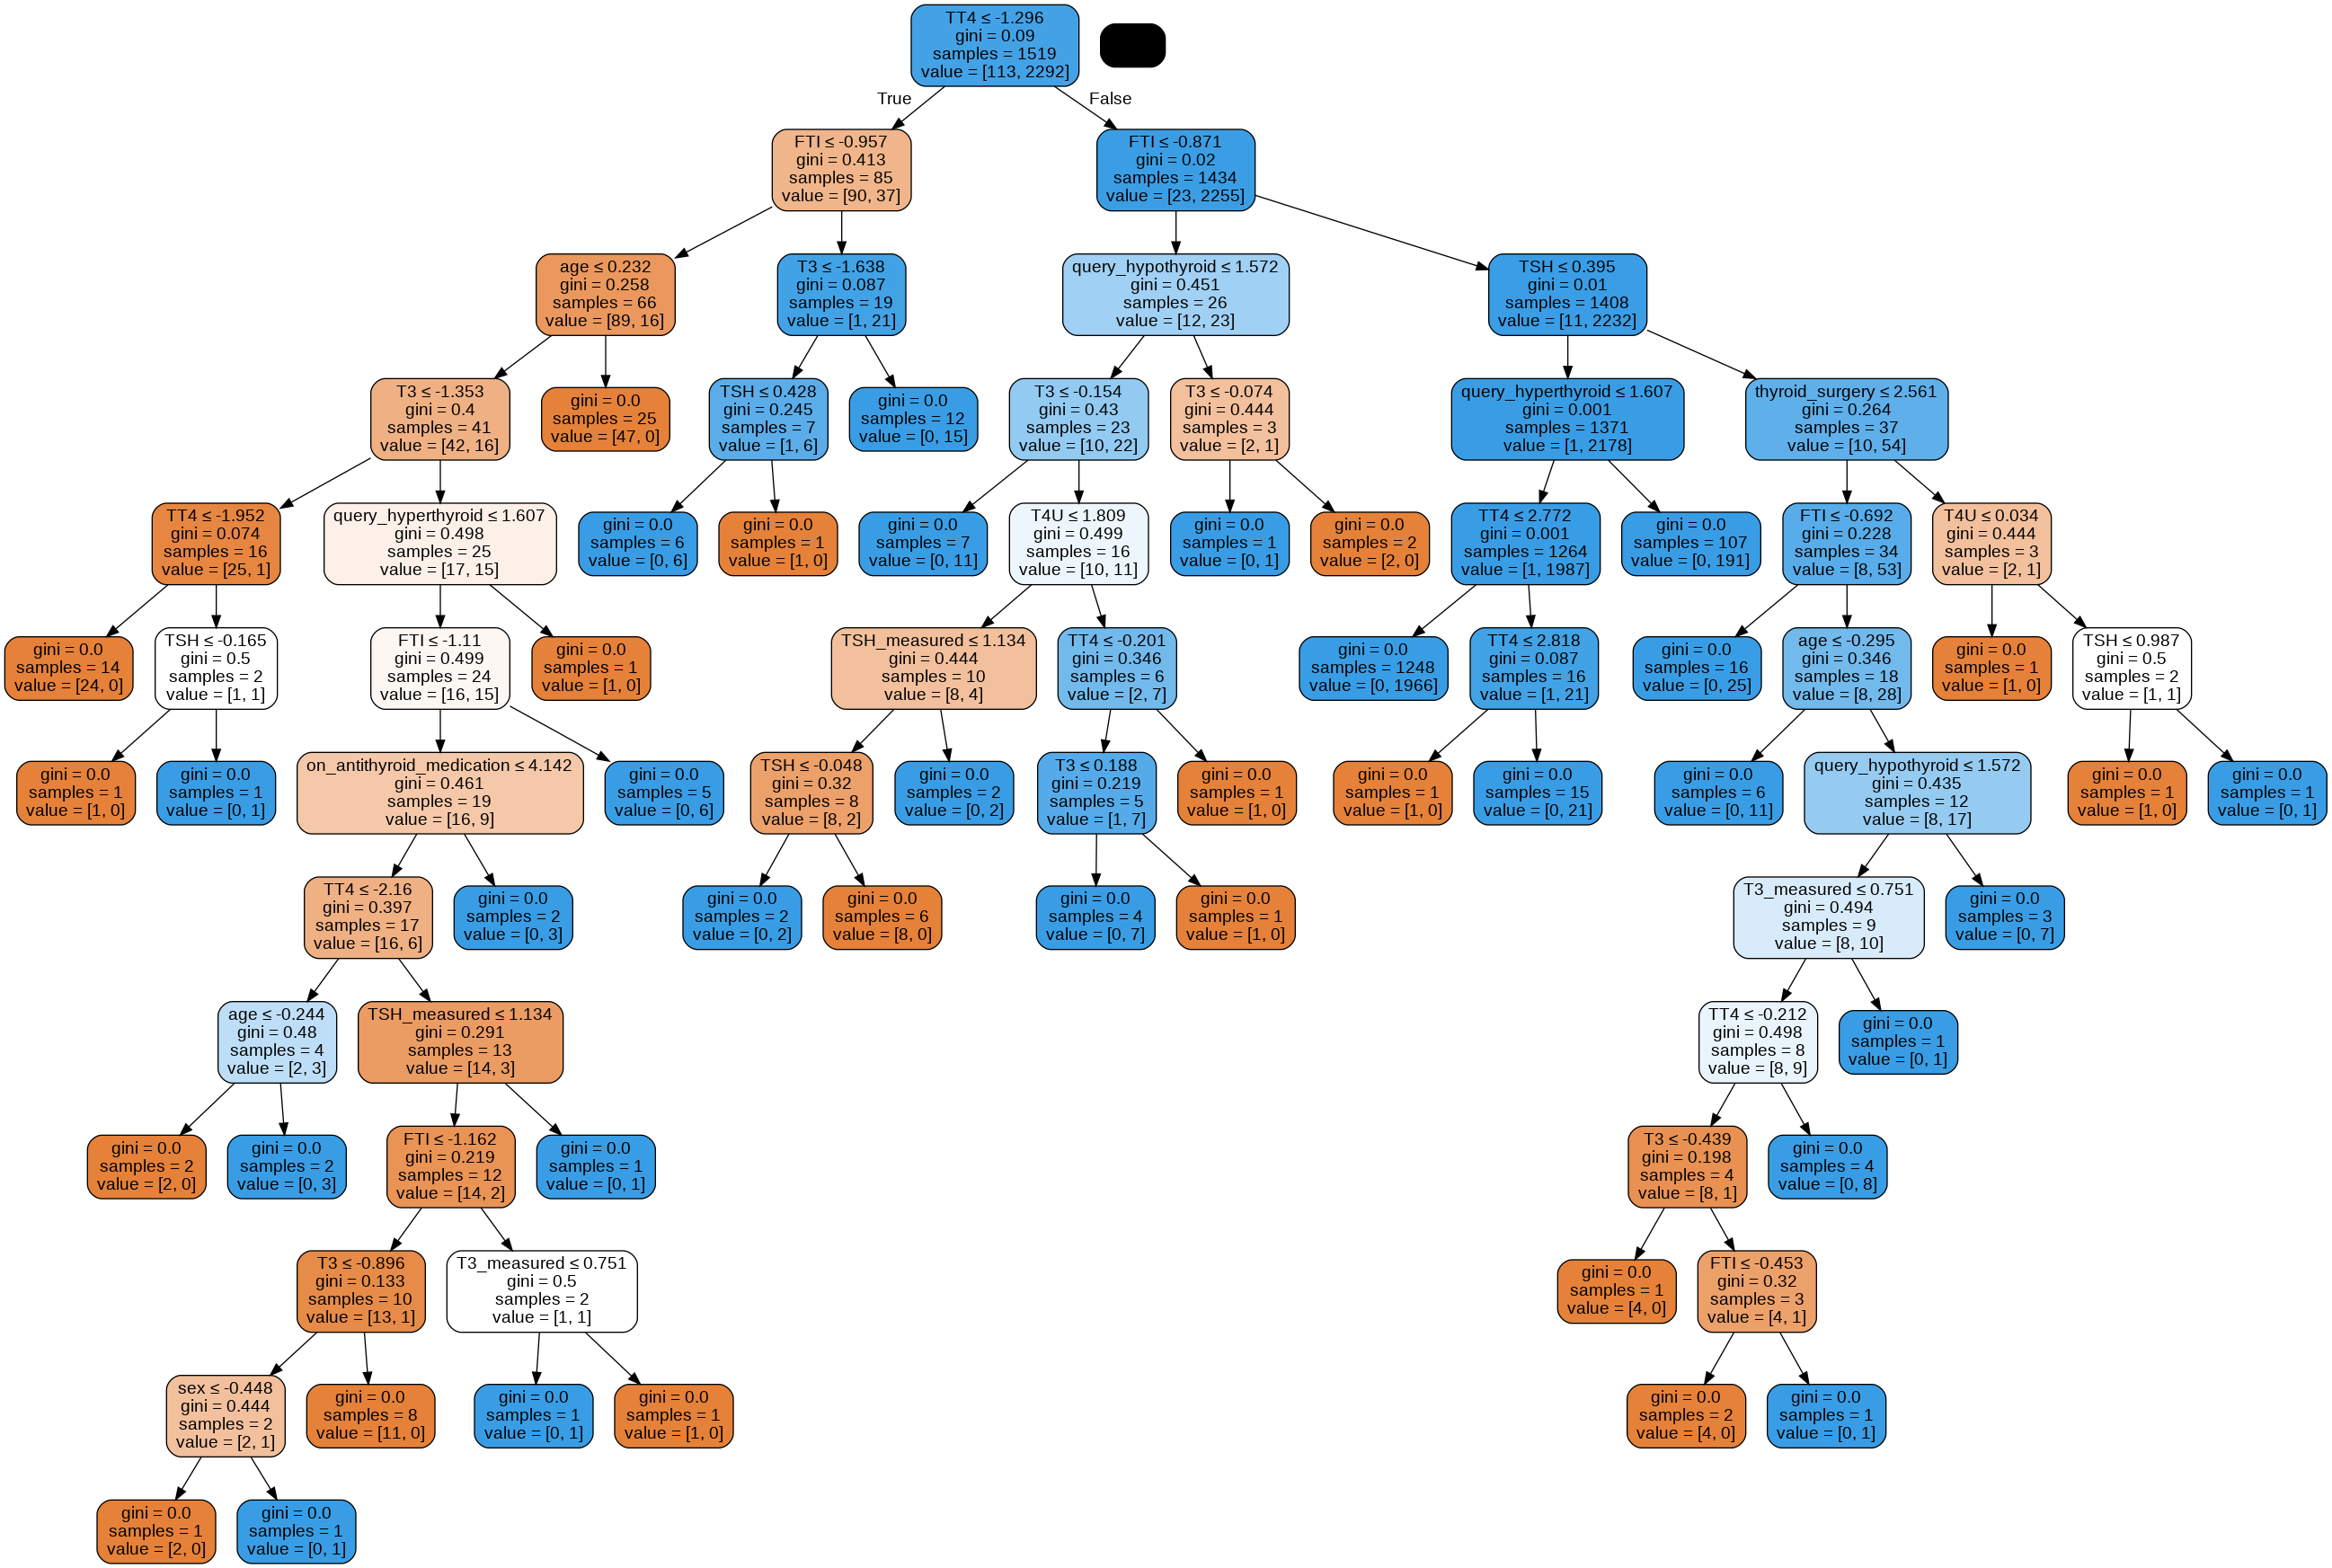

In [156]:
# Visualisation of our Random Forest
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('finance.png')
Image(graph.create_png())

In [157]:
# Perform Hyperparameter Tuning 
# We will use Randomized Search CV
# Start by importing the Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Set up our hyperparameters
random_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
    }
random = RandomizedSearchCV(estimator = forest , param_distributions = random_grid, cv = 10, n_jobs = -1, random_state = 1, scoring = 'accuracy')
random.fit(X_train_forest, y_train_forest)
print(random.best_params_)
print(random.best_score_)

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 100}
0.9866926002766252


In [159]:
# Create a Random Forest classifier with the identified hyperparameters
forest_tune = RandomForestClassifier( n_estimators = 200, min_samples_split = 10, min_samples_leaf = 3, max_features =3,  max_depth = 100)
# Train the Random Forest model 
forest_tune.fit(X_train_forest, y_train_forest)
# Predict based on the model we've trained
y_pred_forest = forest_tune.predict(X_test_forest)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_forest, y_pred_forest))

Accuracy: 0.9750830564784053


After tuning our hyperparameters our model stil performs really well but not as well as our base model (Random Forest Model)

##Gradient Boosting

In [160]:
# The second model we will create is a Gradient Boosting model
# We will start by importing the library
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting classifier
gb = GradientBoostingClassifier()
# Train our model on our training set
gb.fit(X_train_forest, y_train_forest)
# # Predict based on our test data
predictions = gb.predict(X_test_forest)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_forest, predictions))

Accuracy: 0.9883720930232558


Our gradient boosting model is 98.8%, this is better than our random forest model before and after hyperparameter tuning

In [161]:
# Perform Hyperparameter Tuning 
# We will use Grid Search CV
# Start by importing the Grid Search CV
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
gb_cv = GridSearchCV(estimator = gb , param_grid = parameters , cv = 5, scoring = 'accuracy')
gb_cv.fit(X_train_forest, y_train_forest)
print(gb_cv.best_params_)
print(gb_cv.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.9925155925155925


In [163]:
# Let's setup the hyperparameters to our model
gb_tune = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, n_estimators =500)
# Train our model on our training set
gb_tune.fit(X_train_forest, y_train_forest)
# # Predict based on our test data
predict = gb_tune.predict(X_test_forest)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_forest, predict))

Accuracy: 0.9883720930232558


Our model didn't imporve after hyperparameter tuning

Gradient boosting model performs better than the Random Forest model

Hence will choosing it over Random Forest,this is based on the accuracy scores generated

##Feature Importance

In [164]:
# Get numerical feature importances
importances = list(tree.feature_importances_)
# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()
# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.04), ('sex', 0.01), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.01), ('thyroid_surgery', 0.01), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.02), ('TSH', 0.05), ('T3_measured', 0.01), ('T3', 0.06), ('TT4_measured', 0.0), ('TT4', 0.6), ('T4U_measured', 0.0), ('T4U', 0.01), ('FTI_measured', 0.0), ('FTI', 0.18), ('TBG_measured', 0.0)]

Variable: TT4                  Importance: 0.6
Variable: FTI                  Importance: 0.18
Variable: T3                   Importance: 0.06
Variable: TSH                  Importance: 0.05
Variable: age                  Importance: 0.04
Variable: TSH_measured         Importance: 0.02
Variable: sex                  Importance: 0.01
Variable: on_antithyroid_medication Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: T3_

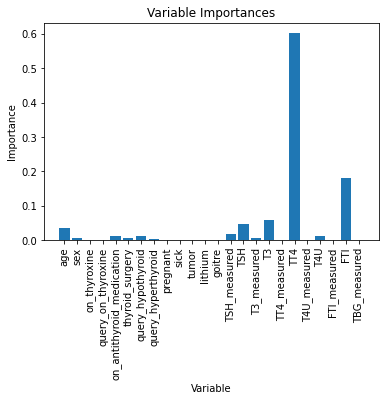

In [165]:
# Let's visualize our findings from the previous code
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


The most relevant features for our model are TT4, FTI , T3, TSH , Age, TSH measured, Sex, on antithyroid medication, thyroid surgery, query hypothyroid, T3 measured and T4U

##Support Vector Machines

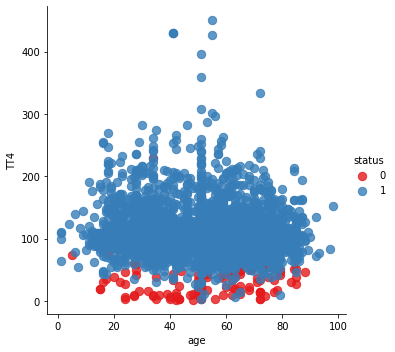

In [183]:
# We will start by visualising a relationship between 2 variables 
# We are going to use FTI and age as our classifying criteria.
from sklearn.svm import SVC,LinearSVC
sns.lmplot(x='age', y='TT4', data= final , hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [194]:
# Specify the input for the model
X_svc = final[['TT4','age']]
y_svc = final.status
# Standardizing the data
scaler = StandardScaler()
X_svc = scaler.fit_transform(X_svc)
# Split our data into train and test 
X_train_sv, X_test_sv, y_train_sv, y_test_sv = train_test_split(X_svc, y_svc, test_size=0.2, random_state=1)
# We will start with linear kernel
# Fit the model
model_svcl = SVC(kernel= 'linear')
model_svcl.fit(X_train_sv,y_train_sv)
# Making prediction using test data
svc_pred = model_svcl.predict(X_test_sv)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_sv, svc_pred))

Accuracy: 0.9634551495016611


In [197]:
# We move on to polynomial kernel
# Fit the model
model_svcp = SVC(kernel= 'poly')
model_svcp.fit(X_train_sv,y_train_sv)
# Making prediction using test data
svc_pred_poly = model_svcp.predict(X_test_sv)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_sv, svc_pred_poly))

Accuracy: 0.9634551495016611


In [196]:
# We will also use rbf kernel
# Fit the model
model_svcr = SVC(kernel= 'rbf')
model_svcr.fit(X_train_sv,y_train_sv)
# Making prediction using test data
svc_pred_rbf = model_svcr.predict(X_test_sv)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_sv, svc_pred_rbf))

Accuracy: 0.9617940199335548


Linear and Polynoial kernel perform at the same level of accuracy 
and they both perform slightly better than rbf kernel

In [207]:
# We will move forward with performing hyperparameter tuning on the polynomial kernel
parameters_grid = {
    "C":[0.001, 0.10, 0.1, 1 ,10, 25, 50 ,100],
    "gamma":[1, 0.1, 0.01, 0.001],
}
grid_svm = GridSearchCV(model_svcp, parameters_grid, cv=10, scoring = 'accuracy')
grid_svm.fit(X_train_sv,y_train_sv)
print(grid_svm.best_params_)
print(grid_svm.best_score_)

{'C': 0.001, 'gamma': 1}
0.9750553250345779


In [208]:
# Apply our hyperparameters
# Fit the model
model_tune = SVC(kernel= 'poly', C = 0.001, gamma = 1)
model_tune.fit(X_train_sv,y_train_sv)
# Making prediction using test data
pred_poly = model_tune.predict(X_test_sv)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_sv, pred_poly))

Accuracy: 0.9634551495016611


Accuracy score hasn't changed after tuning our hyperparameters

In [218]:
# Add additional features to our model 
y_model = final.status
X_model = final[['TT4','FTI','T3','TSH','age','TSH_measured']]
# Standardizing the data
scaler = StandardScaler()
X_model = scaler.fit_transform(X_model)
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X_model, y_model, test_size=0.2, random_state=1)
# Fit the model
model_poly = SVC(kernel= 'poly', C = 0.001, gamma = 1)
model_poly.fit(X_train_model,y_train_model)
# Making prediction using test data
prediction_poly = model_poly.predict(X_test_model)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_model, prediction_poly))

Accuracy: 0.9750830564784053


After adding additional features our model accuracy improved compared to when we had 2 features

##Conclusion


High cases of hypothyroidism were observed in:

51, 72, 50, 65 and 62 year olds

females

people who were not pregnant

people who were not thyroxine drugs

people who have never taken thyroxine drugs

people who were not taking anti-thyroid drugs

people who were not in throat surgery

people who had not had hypothyroidism

people who had not had hyperthyroidism

people who were not sick 

people who do not have thyroid tumor

people who are not taking drugs containing lithium

people who do not have thyroid goitre 

people who had their TSH, T3, TT4, T4U measured

people who did not have their TBG measured

Gradient boosting performed better than Random forest and SVM

Although all our models performed very well with high accuracy scores

##Recommendation

Implementing Gradient boosing for thyroidism prediction at approximately 99% accuracy


##Challenging the Solution

We can run the models after dealing with the outliers in our data